In [1]:
#Import packages for cleaning and visualization
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import category_encoders as ce
%matplotlib inline

In [2]:
#load in the data
movie = pd.read_csv('movie.csv')
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [3]:
#drop the duplicates, if any
movie.drop_duplicates(subset=['movie_title'],inplace=True)

In [4]:
# Reset the index to be the Movie Title
movie.set_index('movie_title',inplace=True)

In [5]:
#Drop missing values, if any
movie = movie.dropna(axis=0,how='any')

In [6]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3655 entries, Avatar  to My Date with Drew 
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3655 non-null   object 
 1   director_name              3655 non-null   object 
 2   num_critic_for_reviews     3655 non-null   float64
 3   duration                   3655 non-null   float64
 4   director_facebook_likes    3655 non-null   float64
 5   actor_3_facebook_likes     3655 non-null   float64
 6   actor_2_name               3655 non-null   object 
 7   actor_1_facebook_likes     3655 non-null   float64
 8   gross                      3655 non-null   float64
 9   genres                     3655 non-null   object 
 10  actor_1_name               3655 non-null   object 
 11  num_voted_users            3655 non-null   int64  
 12  cast_total_facebook_likes  3655 non-null   int64  
 13  actor_3_name               3655 n

In [7]:
#Create subframe for plotting
plot = movie[['director_facebook_likes','num_critic_for_reviews','duration','gross','num_voted_users','cast_total_facebook_likes','num_user_for_reviews','budget','imdb_score','movie_facebook_likes']]

In [8]:
plot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3655 entries, Avatar  to My Date with Drew 
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   director_facebook_likes    3655 non-null   float64
 1   num_critic_for_reviews     3655 non-null   float64
 2   duration                   3655 non-null   float64
 3   gross                      3655 non-null   float64
 4   num_voted_users            3655 non-null   int64  
 5   cast_total_facebook_likes  3655 non-null   int64  
 6   num_user_for_reviews       3655 non-null   float64
 7   budget                     3655 non-null   float64
 8   imdb_score                 3655 non-null   float64
 9   movie_facebook_likes       3655 non-null   int64  
dtypes: float64(7), int64(3)
memory usage: 314.1+ KB


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0, 0.5, 'director_facebook_likes'),
  Text(0, 1.5, 'num_critic_for_reviews'),
  Text(0, 2.5, 'duration'),
  Text(0, 3.5, 'gross'),
  Text(0, 4.5, 'num_voted_users'),
  Text(0, 5.5, 'cast_total_facebook_likes'),
  Text(0, 6.5, 'num_user_for_reviews'),
  Text(0, 7.5, 'budget'),
  Text(0, 8.5, 'imdb_score'),
  Text(0, 9.5, 'movie_facebook_likes')])

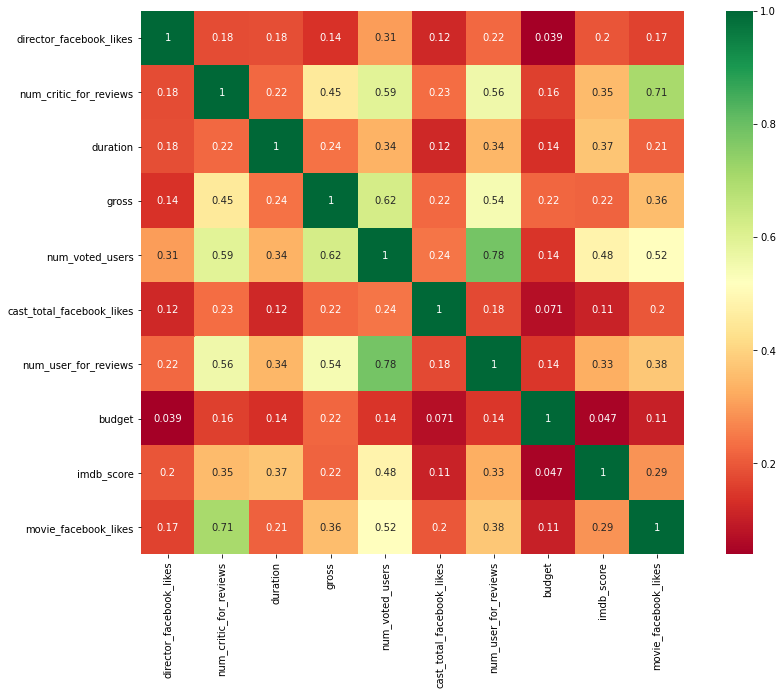

In [9]:
#Heatmap for a general view of data correlations
corr_matrix = plot.corr().abs()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix, vmax=1, square=True, annot=True,cmap=plt.cm.RdYlGn)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

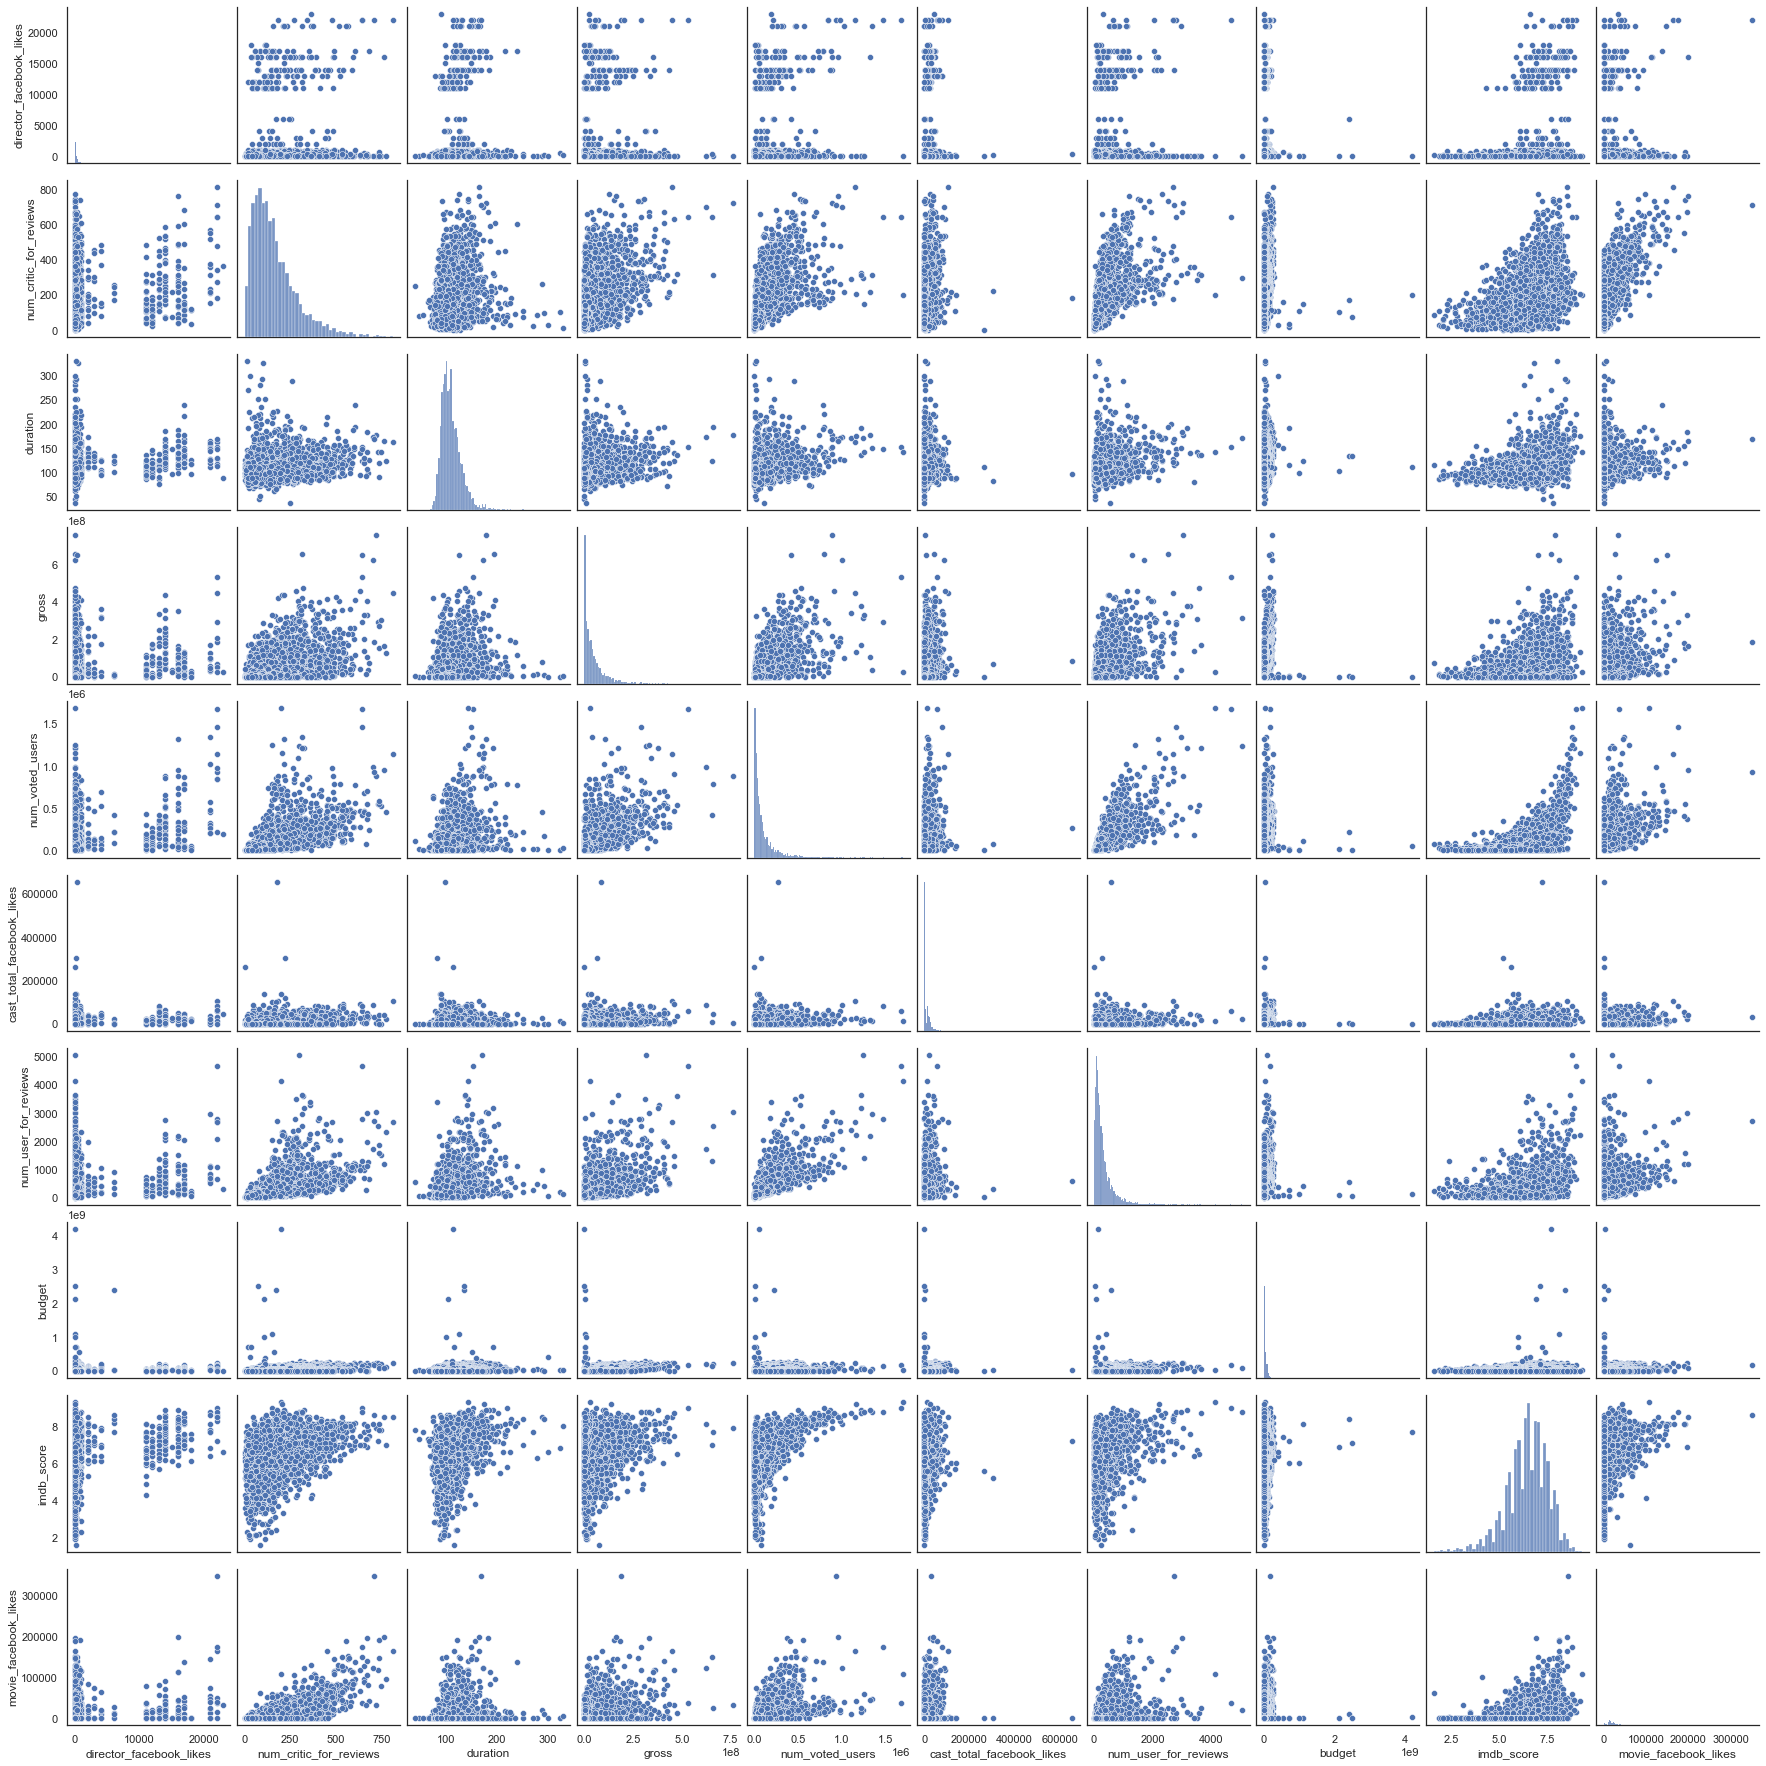

In [10]:
#Create a scatter plot for visulization
sns.set_theme(style="white")
sns.pairplot(plot)

<AxesSubplot:xlabel='num_voted_users'>

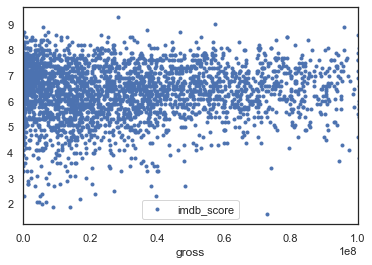

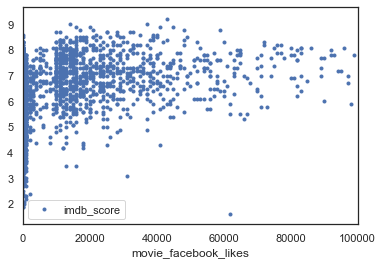

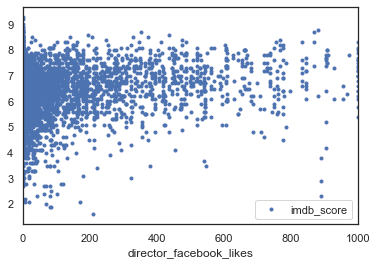

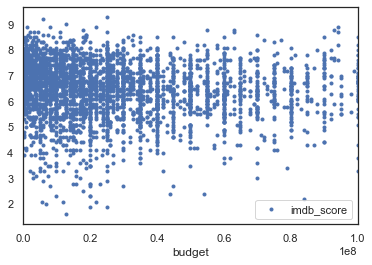

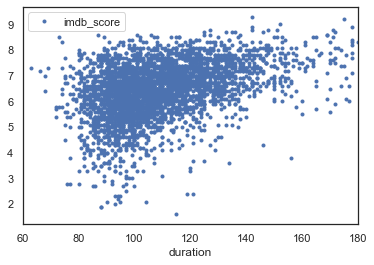

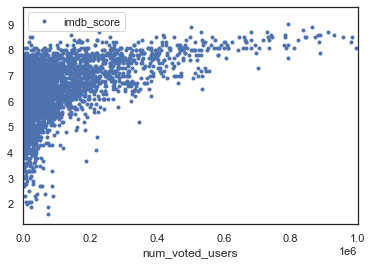

In [11]:
#Plot some outstanding variables according to the above outputs
plot.plot(x='gross',y='imdb_score',style='.',xlim=(0,1e8))
plot.plot(x='movie_facebook_likes',y='imdb_score',style='.',xlim=(0,1e5))
plot.plot(x='director_facebook_likes',y='imdb_score',style='.',xlim=(0,1e3))
plot.plot(x='budget',y='imdb_score',style='.',xlim=(0,1e8))
plot.plot(x='duration',y='imdb_score',style='.',xlim=(60,180))
plot.plot(x='num_voted_users',y='imdb_score',style='.',xlim=(0,1e6))

In [12]:
#Transform categorical datas
encoder = ce.BinaryEncoder(cols = ['genres','content_rating','color','director_name','language','country'])
movie_encoded = encoder.fit_transform(movie)

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [13]:
# Drop variables that have insignificant variances
#var = np.var(movie_encoded)
#listret = [T[0] for T in (var<0.05).iteritems() if T[1] == False]
#result = movie_encoded[listret]

In [14]:
#Drop other data with dtype "object"
result = movie_encoded.select_dtypes(exclude = 'object')

In [15]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3655 entries, Avatar  to My Date with Drew 
Data columns (total 60 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color_0                    3655 non-null   int64  
 1   color_1                    3655 non-null   int64  
 2   director_name_0            3655 non-null   int64  
 3   director_name_1            3655 non-null   int64  
 4   director_name_2            3655 non-null   int64  
 5   director_name_3            3655 non-null   int64  
 6   director_name_4            3655 non-null   int64  
 7   director_name_5            3655 non-null   int64  
 8   director_name_6            3655 non-null   int64  
 9   director_name_7            3655 non-null   int64  
 10  director_name_8            3655 non-null   int64  
 11  director_name_9            3655 non-null   int64  
 12  director_name_10           3655 non-null   int64  
 13  director_name_11           3655 n

In [16]:
#Round imdb_score for ML analysis
result.imdb_score = result.imdb_score.round(0)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [17]:
#Analysis and prediction
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

In [18]:
y = result['imdb_score']

In [19]:
X = result.drop(columns = ['imdb_score'])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [21]:
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto').fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
LR.predict(X_test)
round(LR.score(X_test,y_test), 4)

0.3516

In [23]:
predictionslr = LR.predict(X_test)

In [24]:
scorelr = round(LR.score(X_test,y_test), 4)

In [25]:
cmlr = metrics.confusion_matrix(y_test,predictionslr)

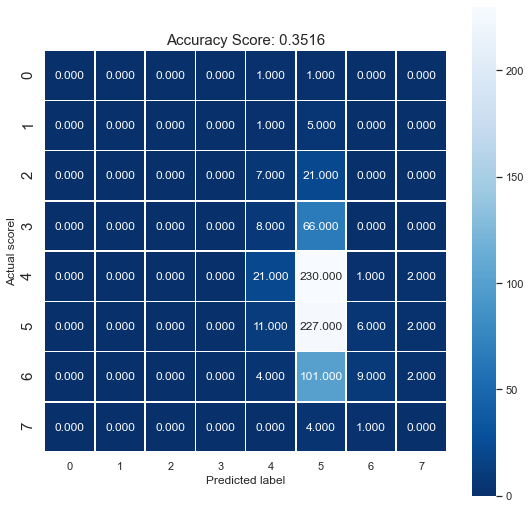

In [38]:
plt.figure(figsize=(9,9))
sns.heatmap(cmlr, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual scorel');
plt.yticks(fontsize=15);
plt.xlabel('Predicted label');
plt.yticks(fontsize=15);
all_sample_title = 'Accuracy Score: {0}'.format(scorelr)
plt.title(all_sample_title, size = 15);

In [27]:
RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(X_train, y_train)
RF.predict(X_test)
round(RF.score(X_test, y_test), 4)

0.5144

In [28]:
predictionsrf = RF.predict(X_test)

In [29]:
scorerf = round(RF.score(X_test,y_test), 4)

In [30]:
cmrf = metrics.confusion_matrix(y_test,predictionsrf)

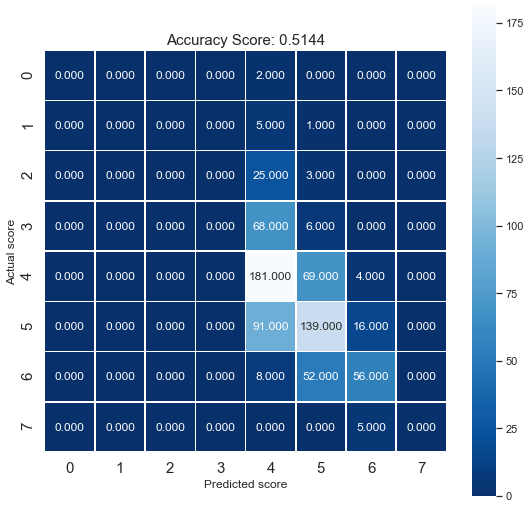

In [31]:
plt.figure(figsize=(9,9))
sns.heatmap(cmrf, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual score');
plt.yticks(fontsize=15);
plt.xlabel('Predicted score');
plt.xticks(fontsize=15);
all_sample_title = 'Accuracy Score: {0}'.format(scorerf)
plt.title(all_sample_title, size = 15);

In [32]:
#SVM analysis
svm = svm.SVC(C=1.0, kernel='rbf', gamma='auto', decision_function_shape='ovr', cache_size=500).fit(X_train, y_train)
round(svm.score(X_test,y_test), 4)

0.3475

In [33]:
predictionssvm = svm.predict(X_test)

In [34]:
scoresvm = round(svm.score(X_test,y_test), 4)

In [35]:
cmsvm = metrics.confusion_matrix(y_test,predictionssvm)

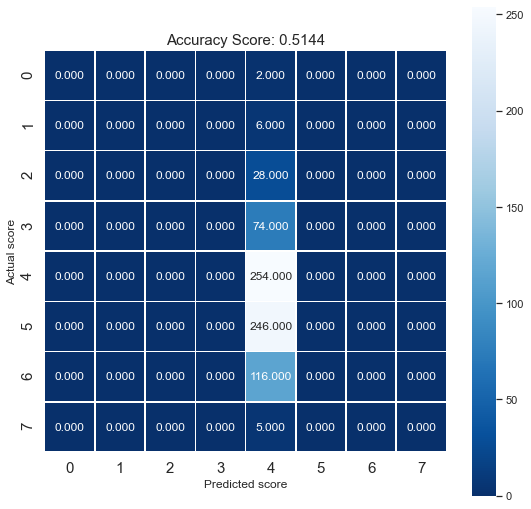

In [36]:
plt.figure(figsize=(9,9))
sns.heatmap(cmsvm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual score');
plt.yticks(fontsize=15);
plt.xlabel('Predicted score');
plt.xticks(fontsize=15);
all_sample_title = 'Accuracy Score: {0}'.format(scorerf)
plt.title(all_sample_title, size = 15);